In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
%matplotlib inline

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [2]:
bike = pd.read_csv('day.csv')

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.drop('instant',axis='columns', inplace=True)
bike.drop('dteday',axis='columns', inplace=True)
bike.drop('casual',axis='columns', inplace=True)
bike.drop('registered',axis='columns', inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [5]:
bike.shape

(730, 12)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [7]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [8]:
bike['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

### Important points:
year: mean is 0.5 which means 50 percent data is of 2018 and rest is of 2019
holiday: 2.8 percent of days are holidays 

## Step 2: Data Preparation
- We have changed season,mnth,weathersit and weekday

In [9]:
bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike['mnth']=bike.mnth.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 3: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [10]:
def pairplot(x):
    sns.pairplot(data = bike, x_vars =x,y_vars='cnt',size=4, aspect=1)

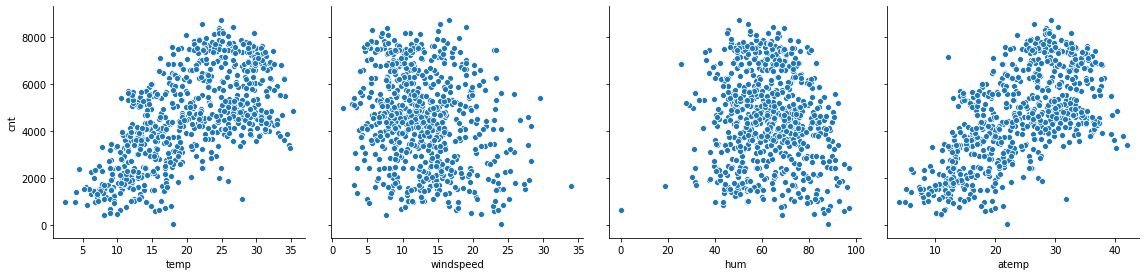

In [11]:
a = ['temp','windspeed','hum','atemp']
pairplot(a)

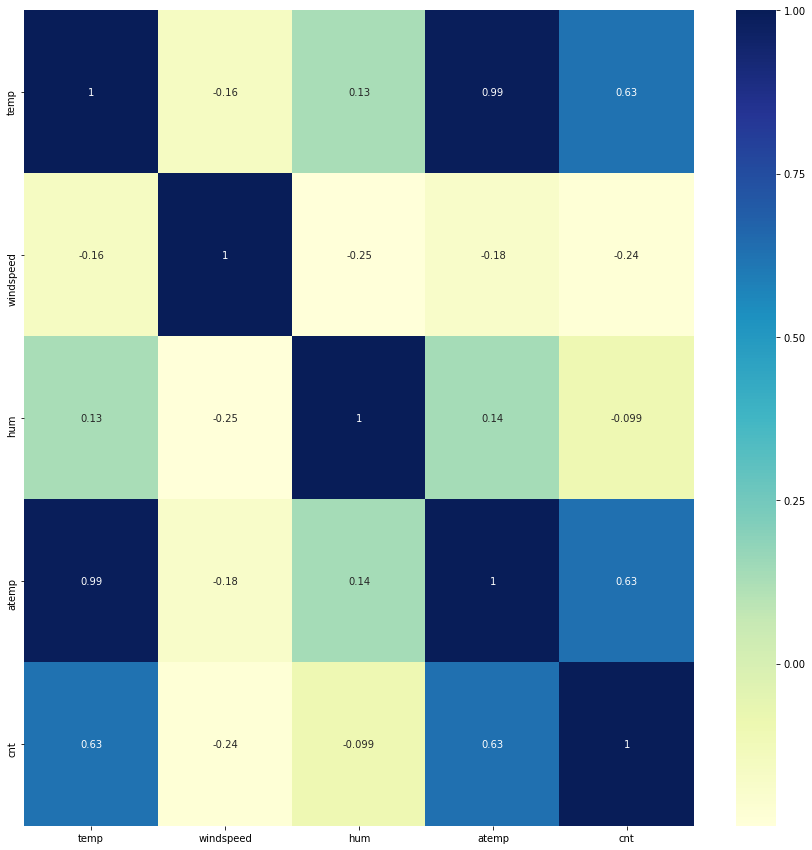

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(bike[a+['cnt']].corr(),cmap="YlGnBu", annot = True)

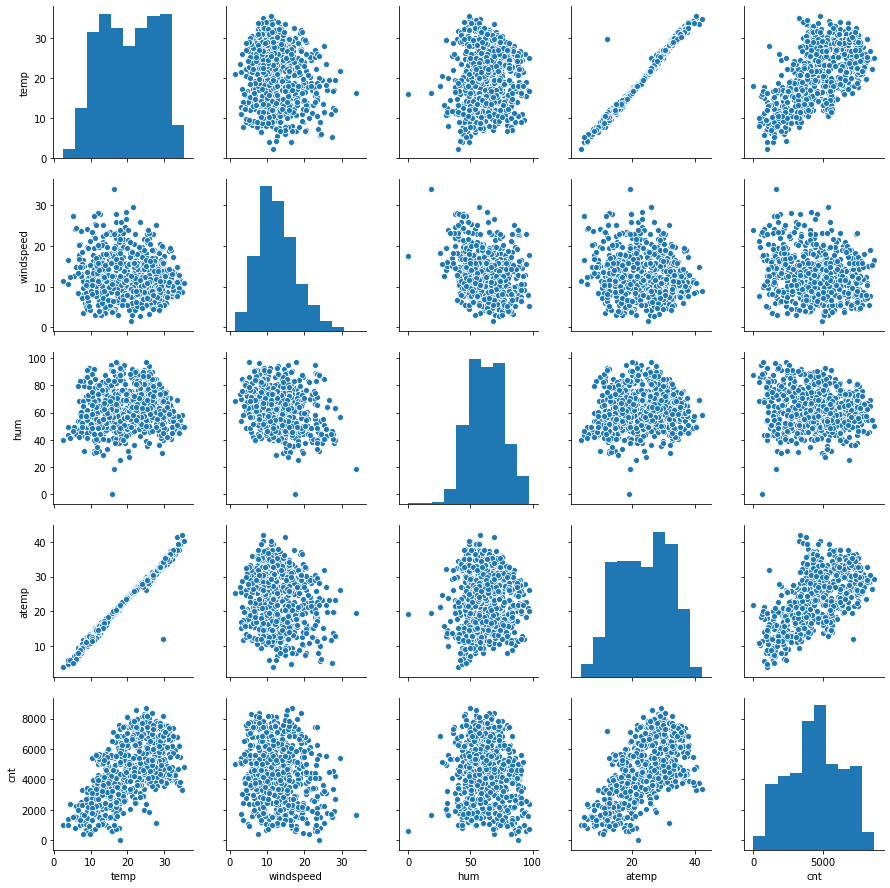

In [13]:
sns.pairplot(bike[['temp','windspeed','hum','atemp','cnt']])

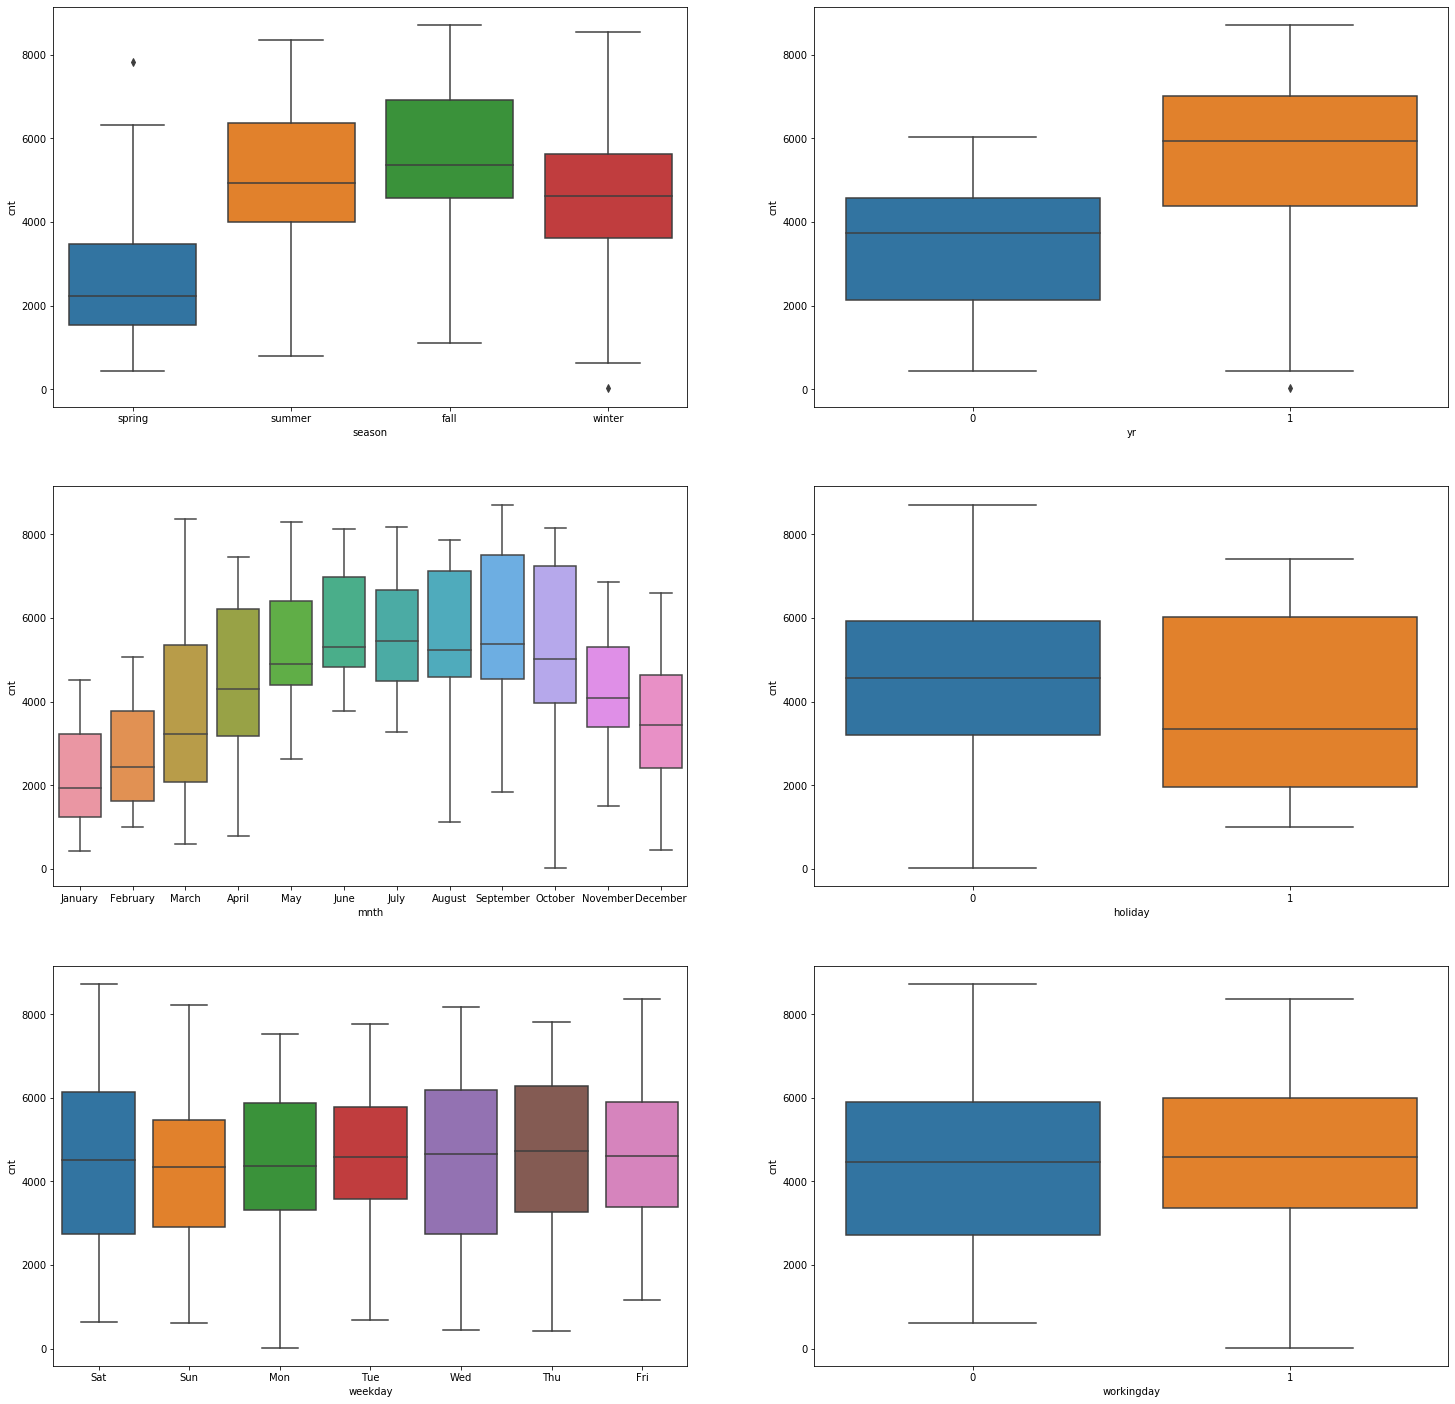

In [14]:
plt.figure(figsize =(25,25))
plt.subplot(3,2,1) # no of Rows, no of Columns, number
sns.boxplot(x='season',y='cnt',data=bike)
plt.subplot(3,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

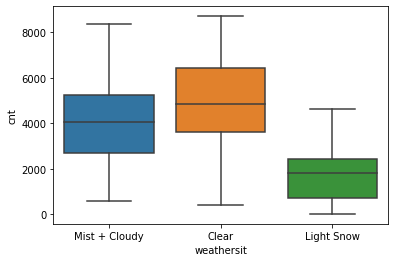

In [15]:
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)

   yr      cnt
0   0  1243103
1   1  2047742

62.225416268466006 


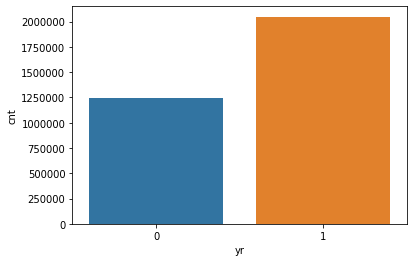

In [16]:
year = pd.pivot_table(bike,index=['yr'],values='cnt',aggfunc='sum').reset_index()
print(year)
print()
print((year.iloc[1,1]/(year.iloc[1,1]+year.iloc[0,1]))*100,end=" ")
print()
sns.barplot(x='yr', y="cnt", data=year)

yr       mnth       0       1   Perct Inc
0     January   38189   96744  153.329493
1    February   48215  101303  110.106813
2       March   64045  164875  157.436178
3       April   94870  174224   83.644988
4         May  135821  195865   44.208186
5        June  143512  202830   41.333129
6        July  141341  203607   44.053742
7      August  136691  214503   56.925474
8   September  127418  218573   71.540128
9     October  123511  198841   60.990519
10   November  102167  152664   49.425940
11   December   87323  123713   41.672870


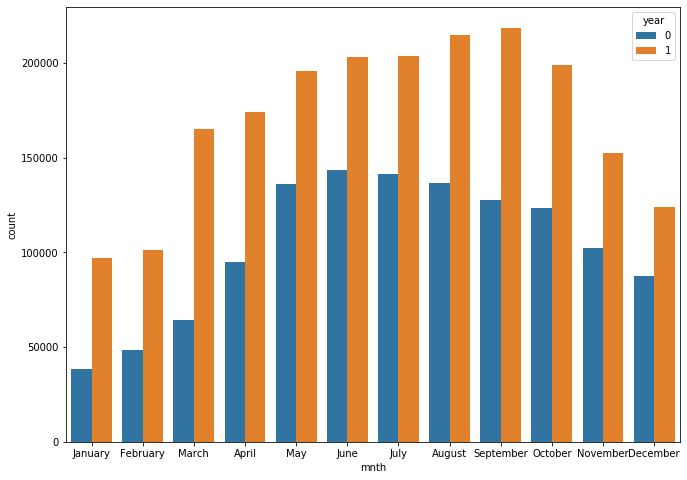

In [17]:
sort_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
table = pd.pivot_table(bike,index=['mnth'],columns=['yr'],values='cnt',aggfunc='sum').reset_index()
table.index = pd.CategoricalIndex(table['mnth'],categories=sort_order,ordered=True)
table = table.sort_index().reset_index(drop=True)
table_melted = pd.melt(table, id_vars='mnth',var_name="year", value_name="count")
table_melted
plt.figure(figsize =(11,8))
table['Perct Inc']= ((table[1]-table[0])*100)/table[0]
print(table)
sns.barplot(x='mnth', y="count", hue="year",\
                data=table_melted)


In [18]:
def plot(x):
    table = pd.pivot_table(bike,index=[x],columns=['yr'],values='cnt',aggfunc='sum').reset_index()
    table_melted = pd.melt(table, id_vars=x,var_name="year", value_name="count")
    table['Total']= table[0]+table[1]
    table['Perct Inc']= ((table[1]-table[0])*100)/table[0]
    print(table)
    sns.barplot(x=x, y="count", hue="year",
                    data=table_melted)
    

yr     weathersit       0        1    Total  Perct Inc
0           Clear  835067  1422885  2257952  70.391717
1      Light Snow   25112    12757    37869 -49.199586
2   Mist + Cloudy  382924   612100   995024  59.848952


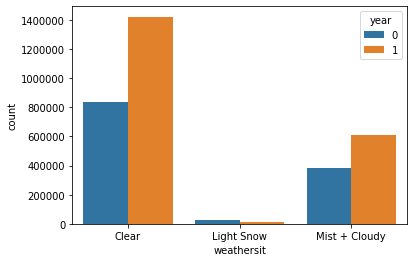

In [19]:
plot('weathersit')

yr  season       0       1    Total   Perct Inc
0     fall  419650  641479  1061129   52.860479
1   spring  150000  319514   469514  113.009333
2   summer  347316  571273   918589   64.482201
3   winter  326137  515476   841613   58.055050


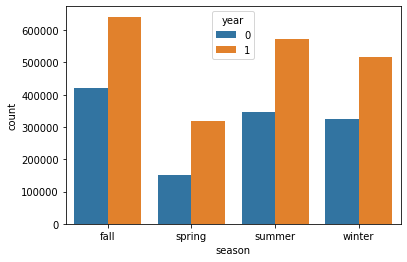

In [20]:
plot('season')

yr  holiday        0        1    Total  Perct Inc
0         0  1213081  1999329  3212410  64.814139
1         1    30022    48413    78435  61.258410


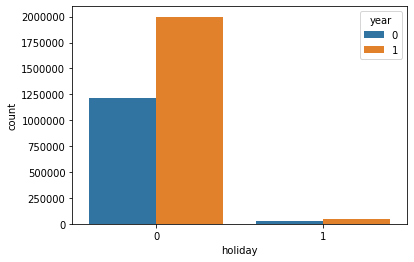

In [21]:
plot('holiday')

yr  workingday       0        1    Total  Perct Inc
0            0  386839   613430  1000269  58.575014
1            1  856264  1434312  2290576  67.508152


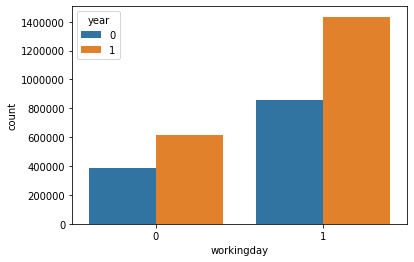

In [22]:
plot('workingday')

yr weekday       0       1   Total  Perct Inc
0      Fri  182006  305784  487790  68.007648
1      Mon  180221  275282  455503  52.746905
2      Sat  179743  298064  477807  65.827876
3      Sun  177074  266953  444027  50.757875
4      Thu  174552  310843  485395  78.080457
5      Tue  180338  288771  469109  60.127649
6      Wed  169169  302045  471214  78.546306


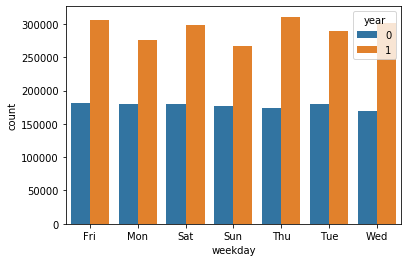

In [23]:
plot('weekday')

### Dummy Variables
The variable `season`,`weathersit`,`weekday`,`mnth` has mutiple levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [24]:
### Creating Dummy Variables:

season = pd.get_dummies(bike['season'], drop_first = True)
weather = pd.get_dummies(bike['weathersit'], drop_first = True)
weekday = pd.get_dummies(bike['weekday'], drop_first = True)
mnth = pd.get_dummies(bike['mnth'], drop_first = True)
bike = pd.concat([bike,season,mnth,weather,weekday], axis = 1)
bike.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   atemp          730 non-null    float64
 5   hum            730 non-null    float64
 6   windspeed      730 non-null    float64
 7   cnt            730 non-null    int64  
 8   spring         730 non-null    uint8  
 9   summer         730 non-null    uint8  
 10  winter         730 non-null    uint8  
 11  August         730 non-null    uint8  
 12  December       730 non-null    uint8  
 13  February       730 non-null    uint8  
 14  January        730 non-null    uint8  
 15  July           730 non-null    uint8  
 16  June           730 non-null    uint8  
 17  March          730 non-null    uint8  
 18  May       

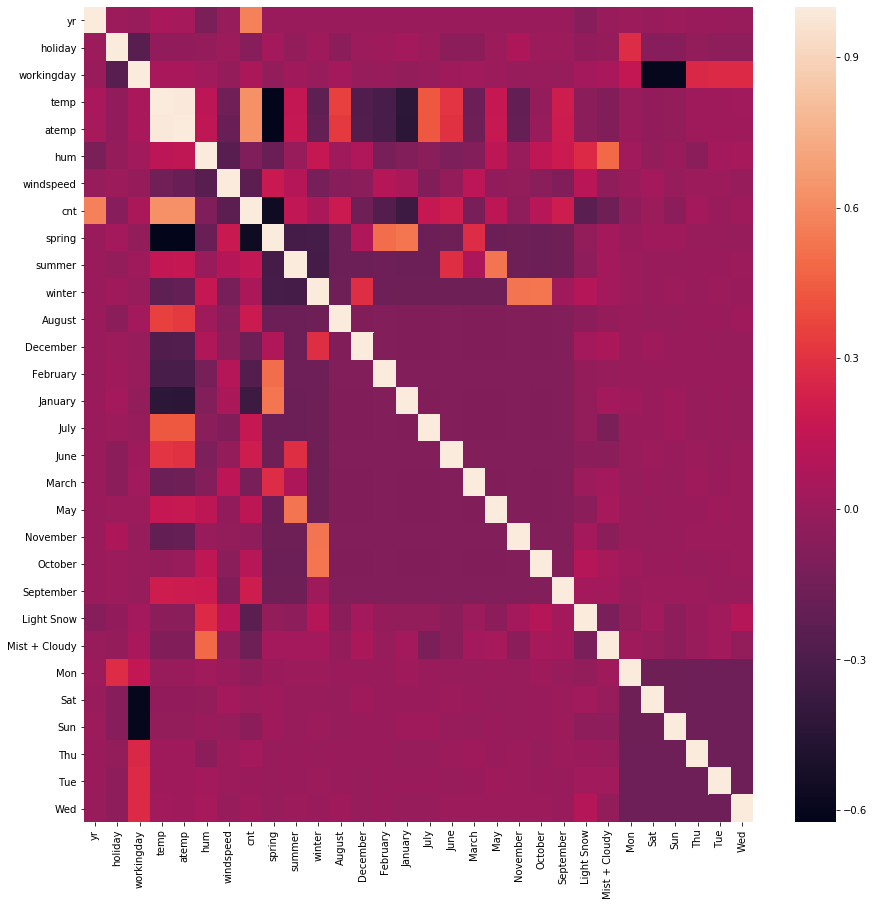

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(bike.corr())

In [26]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Light Snow,Mist + Cloudy,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [27]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bike, train_size = 0.7, random_state = 333)

In [28]:
df_train.shape

(510, 30)

### Rescaling the Features 

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','windspeed','hum','atemp','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Light Snow,Mist + Cloudy,Mon,Sat,Sun,Thu,Tue,Wed
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,1,0,0,0,0,1,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,...,0,0,0,0,1,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,0,1,0,0,1,0,0,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,1,0,...,0,0,0,0,0,0,1,0,0,0
502,1,0,1,0.629300,0.619631,0.543723,0.235894,0.876323,0,1,...,0,0,0,0,0,0,0,0,0,0


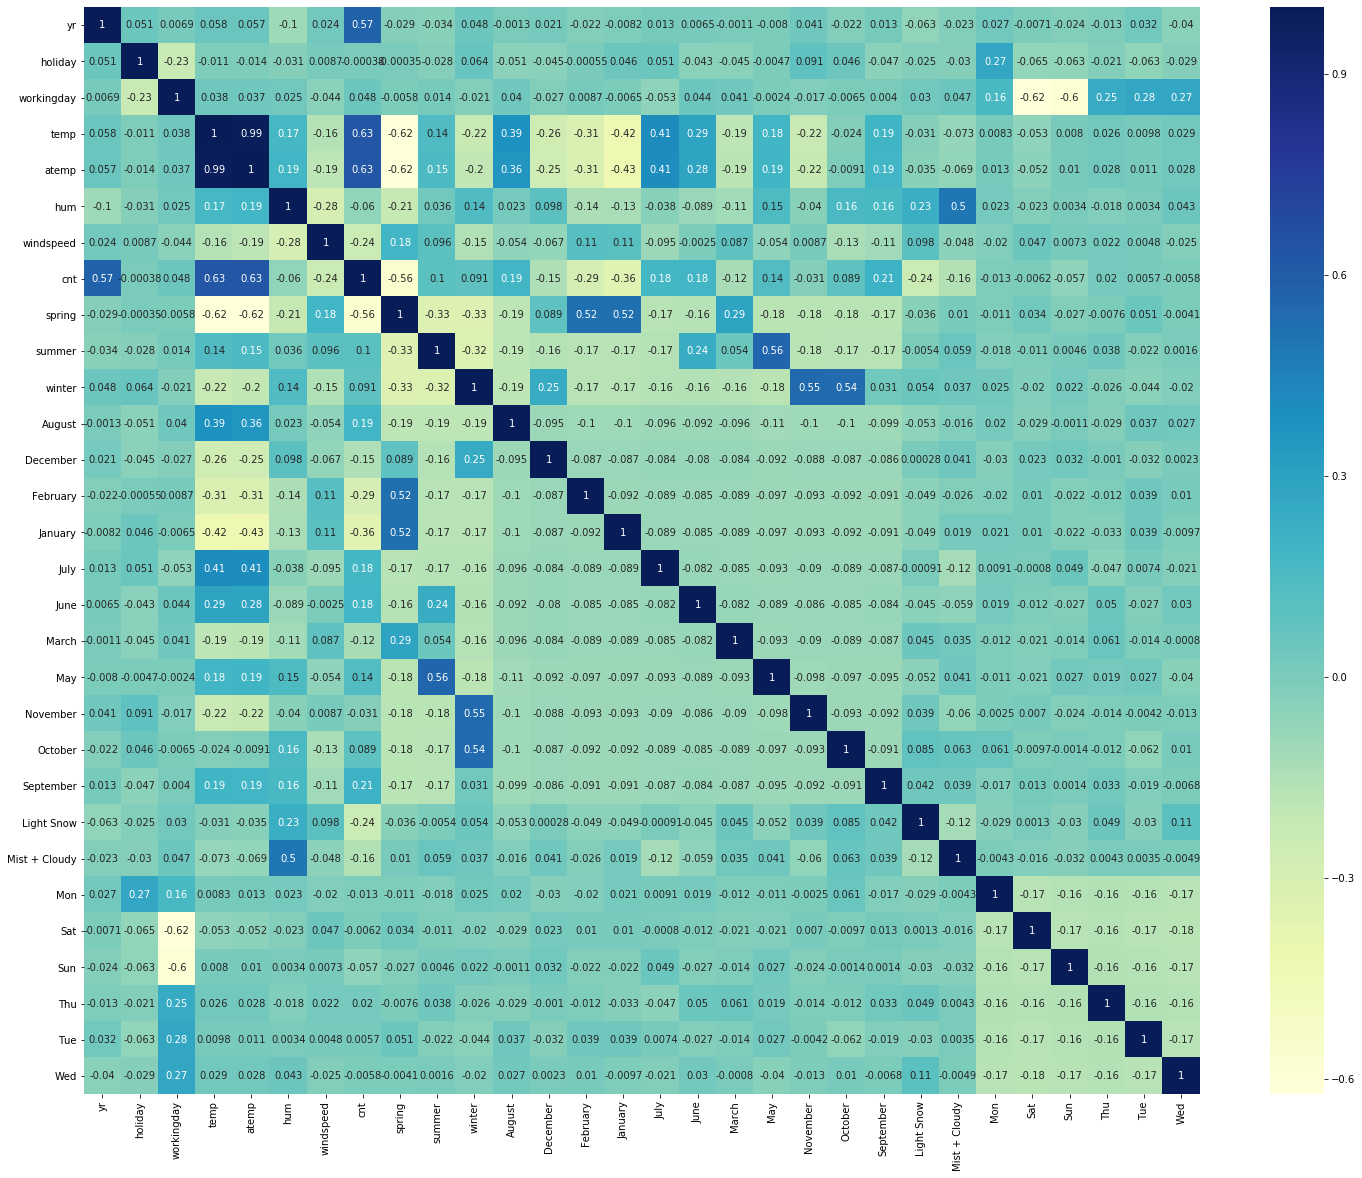

In [30]:
#Lets check Correlation Coefficient
plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [31]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [32]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 8),
 ('winter', True, 1),
 ('August', False, 14),
 ('December', False, 5),
 ('February', False, 11),
 ('January', False, 12),
 ('July', True, 1),
 ('June', False, 10),
 ('March', True, 1),
 ('May', False, 4),
 ('November', False, 2),
 ('October', False, 7),
 ('September', True, 1),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', False, 3),
 ('Mon', False, 6),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 13),
 ('Tue', False, 9),
 ('Wed', False, 15)]

In [35]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'winter', 'July', 'March', 'September', 'Light Snow', 'Sat',
       'Sun'],
      dtype='object')

In [36]:
X_train.columns[~rfe.support_]

Index(['summer', 'August', 'December', 'February', 'January', 'June', 'May',
       'November', 'October', 'Mist + Cloudy', 'Mon', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [37]:
X_train_rfe = X_train[col]

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm 

In [39]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [40]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_lm)
lr_model1 = lr.fit()
lr_model1.params
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.4
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          4.68e-181
Time:                        19:28:01   Log-Likelihood:                 493.56
No. Observations:                 510   AIC:                            -957.1
Df Residuals:                     495   BIC:                            -893.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2963      0.026     11.294      0.000       0.245       0.348
yr             0.2256      0.008     26.868      0.000       0.209       0.242
holiday        0.0478      0.023      2.085      0.038       0.003       0.093
workingday     0.0892      0.010      9.102      0.000       0.070       0.108
temp           0.3490      0.133      2.633      0.009       0.089       0.609
atemp          0.1668      0.139      1.199      0.231      -0.106       0.440
hum           -0.2663      0.031     -8.561      0.000      -0.327      -0.205
windspeed     -0.1974      0.028     -6.935      0.000      -0.253      -0.141
spring        -0.1149      0.016     -7.397      0.000      -0.145      -0.084
winter         0.0619      0.013      4.793      0.000       0.037       0.087
July          -0.0524      0.018     -2.983      0.003      -0.087      -0.018
March          0.0461      0.016      2.833      0.005       0.014       0.078
September      0.0687      0.016      4.345      0.000       0.038       0.100
Light Snow    -0.2248      0.028     -8.136      0.000      -0.279      -0.171
Sat            0.1053      0.012      8.747      0.000       0.082       0.129
Sun            0.0539      0.012      4.356      0.000       0.030       0.078
==============================================================================
Omnibus:                       73.690   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.270
Skew:                          -0.824   Prob(JB):                     4.70e-32
Kurtosis:                       5.018   Cond. No.                     8.54e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.14e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [41]:
calculateVIF(X_train_rfe)

,Features,VIF
3,temp,53.38
4,atemp,51.64
2,workingday,41.62
13,Sat,9.80
14,Sun,9.38
7,spring,2.66
1,holiday,2.44
8,winter,1.79
9,July,1.31
5,hum,1.27


In [42]:
#atemp has high P Value and VIF so we will remove it
X_train_rfe = X_train_rfe.drop('atemp', 1)

In [43]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_lm)
lr_model2 = lr.fit()
lr_model2.params
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     187.6
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          6.85e-182
Time:                        19:28:01   Log-Likelihood:                 492.82
No. Observations:                 510   AIC:                            -957.6
Df Residuals:                     496   BIC:                            -898.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2987      0.026     11.415      0.000       0.247       0.350
yr             0.2256      0.008     26.856      0.000       0.209       0.242
holiday        0.0477      0.023      2.077      0.038       0.003       0.093
workingday     0.0899      0.010      9.189      0.000       0.071       0.109
temp           0.5035      0.031     16.174      0.000       0.442       0.565
hum           -0.2645      0.031     -8.509      0.000      -0.326      -0.203
windspeed     -0.2034      0.028     -7.256      0.000      -0.258      -0.148
spring        -0.1151      0.016     -7.409      0.000      -0.146      -0.085
winter         0.0632      0.013      4.900      0.000       0.038       0.088
July          -0.0525      0.018     -2.987      0.003      -0.087      -0.018
March          0.0468      0.016      2.881      0.004       0.015       0.079
September      0.0677      0.016      4.286      0.000       0.037       0.099
Light Snow    -0.2259      0.028     -8.174      0.000      -0.280      -0.172
Sat            0.1063      0.012      8.840      0.000       0.083       0.130
Sun            0.0548      0.012      4.438      0.000       0.031       0.079
==============================================================================
Omnibus:                       72.116   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.344
Skew:                          -0.810   Prob(JB):                     3.35e-31
Kurtosis:                       4.994   Cond. No.                     1.11e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.15e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [44]:
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,41.35
12,Sat,9.73
13,Sun,9.31
3,temp,2.94
6,spring,2.66
1,holiday,2.43
7,winter,1.78
8,July,1.31
4,hum,1.27
5,windspeed,1.18


In [45]:
# workingday dropped due to high VIF and P VALUE
X_train_rfe = X_train_rfe.drop('workingday', 1)

In [46]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_lm)
lr_model3 = lr.fit()
lr_model3.params
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     187.6
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          6.85e-182
Time:                        19:28:02   Log-Likelihood:                 492.82
No. Observations:                 510   AIC:                            -957.6
Df Residuals:                     496   BIC:                            -898.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3886      0.032     12.093      0.000       0.325       0.452
yr             0.2256      0.008     26.856      0.000       0.209       0.242
holiday       -0.0422      0.028     -1.528      0.127      -0.097       0.012
temp           0.5035      0.031     16.174      0.000       0.442       0.565
hum           -0.2645      0.031     -8.509      0.000      -0.326      -0.203
windspeed     -0.2034      0.028     -7.256      0.000      -0.258      -0.148
spring        -0.1151      0.016     -7.409      0.000      -0.146      -0.085
winter         0.0632      0.013      4.900      0.000       0.038       0.088
July          -0.0525      0.018     -2.987      0.003      -0.087      -0.018
March          0.0468      0.016      2.881      0.004       0.015       0.079
September      0.0677      0.016      4.286      0.000       0.037       0.099
Light Snow    -0.2259      0.028     -8.174      0.000      -0.280      -0.172
Sat            0.0164      0.012      1.386      0.166      -0.007       0.040
Sun           -0.0351      0.012     -2.894      0.004      -0.059      -0.011
==============================================================================
Omnibus:                       72.116   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.344
Skew:                          -0.810   Prob(JB):                     3.35e-31
Kurtosis:                       4.994   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
calculateVIF(X_train_rfe)

,Features,VIF
3,hum,14.75
2,temp,13.08
4,windspeed,4.96
5,spring,2.53
0,yr,2.04
6,winter,1.92
7,July,1.41
11,Sat,1.22
12,Sun,1.21
8,March,1.20


In [48]:
# Due to High P-Value will drop holiday 
X_train_rfe = X_train_rfe.drop('holiday', 1)

In [49]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_lm)
lr_model4 = lr.fit()
lr_model4.params
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.5
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.50e-182
Time:                        19:28:02   Log-Likelihood:                 491.63
No. Observations:                 510   AIC:                            -957.3
Df Residuals:                     497   BIC:                            -902.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3878      0.032     12.054      0.000       0.325       0.451
yr             0.2251      0.008     26.780      0.000       0.209       0.242
temp           0.5034      0.031     16.147      0.000       0.442       0.565
hum           -0.2637      0.031     -8.474      0.000      -0.325      -0.203
windspeed     -0.2043      0.028     -7.280      0.000      -0.259      -0.149
spring        -0.1158      0.016     -7.444      0.000      -0.146      -0.085
winter         0.0618      0.013      4.801      0.000       0.037       0.087
July          -0.0541      0.018     -3.082      0.002      -0.089      -0.020
March          0.0479      0.016      2.945      0.003       0.016       0.080
September      0.0684      0.016      4.333      0.000       0.037       0.099
Light Snow    -0.2250      0.028     -8.132      0.000      -0.279      -0.171
Sat            0.0178      0.012      1.511      0.132      -0.005       0.041
Sun           -0.0336      0.012     -2.776      0.006      -0.057      -0.010
==============================================================================
Omnibus:                       77.095   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.259
Skew:                          -0.842   Prob(JB):                     7.10e-35
Kurtosis:                       5.136   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
calculateVIF(X_train_rfe)

,Features,VIF
2,hum,14.75
1,temp,13.08
3,windspeed,4.95
4,spring,2.53
0,yr,2.04
5,winter,1.90
6,July,1.41
10,Sat,1.21
7,March,1.20
11,Sun,1.20


In [51]:
# Dropping hum due to High VIF.
X_train_rfe = X_train_rfe.drop('hum', 1)

In [52]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_lm)
lr_model5 = lr.fit()
lr_model5.params
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     187.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          3.38e-169
Time:                        19:28:03   Log-Likelihood:                 457.21
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     498   BIC:                            -839.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2133      0.026      8.074      0.000       0.161       0.265
yr             0.2326      0.009     26.044      0.000       0.215       0.250
temp           0.4688      0.033     14.193      0.000       0.404       0.534
windspeed     -0.1415      0.029     -4.893      0.000      -0.198      -0.085
spring        -0.1162      0.017     -6.992      0.000      -0.149      -0.084
winter         0.0516      0.014      3.767      0.000       0.025       0.079
July          -0.0360      0.019     -1.933      0.054      -0.073       0.001
March          0.0557      0.017      3.214      0.001       0.022       0.090
September      0.0581      0.017      3.452      0.001       0.025       0.091
Light Snow    -0.2872      0.029    -10.074      0.000      -0.343      -0.231
Sat            0.0178      0.013      1.411      0.159      -0.007       0.043
Sun           -0.0350      0.013     -2.701      0.007      -0.060      -0.010
==============================================================================
Omnibus:                       80.487   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.403
Skew:                          -0.897   Prob(JB):                     1.80e-34
Kurtosis:                       5.023   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
calculateVIF(X_train_rfe)

,Features,VIF
2,windspeed,4.91
1,temp,4.86
0,yr,2.04
3,spring,1.81
4,winter,1.37
5,July,1.36
9,Sat,1.21
6,March,1.20
10,Sun,1.20
7,September,1.19


In [54]:
# DRopping July due to High P value,
X_train_rfe = X_train_rfe.drop('July', 1)
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_lm)
lr_model6 = lr.fit()
lr_model6.params
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     204.9
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.47e-169
Time:                        19:28:03   Log-Likelihood:                 455.31
No. Observations:                 510   AIC:                            -888.6
Df Residuals:                     499   BIC:                            -842.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2216      0.026      8.476      0.000       0.170       0.273
yr             0.2327      0.009     25.981      0.000       0.215       0.250
temp           0.4468      0.031     14.369      0.000       0.386       0.508
windspeed     -0.1379      0.029     -4.765      0.000      -0.195      -0.081
spring        -0.1193      0.017     -7.196      0.000      -0.152      -0.087
winter         0.0520      0.014      3.783      0.000       0.025       0.079
March          0.0572      0.017      3.294      0.001       0.023       0.091
September      0.0643      0.017      3.876      0.000       0.032       0.097
Light Snow    -0.2895      0.029    -10.136      0.000      -0.346      -0.233
Sat            0.0168      0.013      1.333      0.183      -0.008       0.042
Sun           -0.0365      0.013     -2.820      0.005      -0.062      -0.011
==============================================================================
Omnibus:                       80.065   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.943
Skew:                          -0.892   Prob(JB):                     2.26e-34
Kurtosis:                       5.027   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
calculateVIF(X_train_rfe)

,Features,VIF
2,windspeed,4.78
1,temp,4.03
0,yr,2.04
3,spring,1.81
4,winter,1.34
8,Sat,1.21
5,March,1.19
9,Sun,1.19
6,September,1.15
7,Light Snow,1.06


## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.a

In [56]:
y_train_pred = lr_model6.predict(X_train_lm)

Text(0.5, 0, 'Errors')

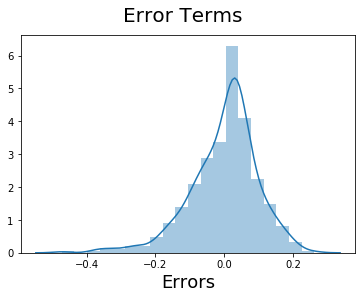

In [57]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [58]:
r2_score(y_train, y_train_pred)

0.8041806223440043

In [59]:
print(X_train_rfe.columns)
lr_model6.params

Index(['yr', 'temp', 'windspeed', 'spring', 'winter', 'March', 'September',
       'Light Snow', 'Sat', 'Sun'],
      dtype='object')


const         0.221563
yr            0.232688
temp          0.446794
windspeed    -0.137933
spring       -0.119344
winter        0.051972
March         0.057230
September     0.064252
Light Snow   -0.289488
Sat           0.016824
Sun          -0.036529
dtype: float64

### Equation is for the Linear Regression model
y(cnt) = 0.221563 +yr *0.232688  + temp *0.446794 -windspeed *0.137933 -spring*0.119344 + March *0.057230 + winter *0.051972 + September *0.064252-Light Snow *0.289488 - Mist + Cloudy*0.082226 -Sun*0.049628 + Sat*0.016824

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [60]:
num_vars = ['temp','windspeed','hum','atemp','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Light Snow,Mist + Cloudy,Mon,Sat,Sun,Thu,Tue,Wed
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,1,0,...,0,0,0,0,0,0,1,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,0,1,...,0,0,0,0,0,1,0,0,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,0,...,0,0,0,0,0,0,1,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,0,1,...,0,0,0,0,0,0,1,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,0,0,1,0,0,0,0,1,0


In [61]:
y_test = df_test.pop('cnt')
X_test = df_test

In [62]:
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

In [63]:
y_pred= lr_model6.predict(X_test_new)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

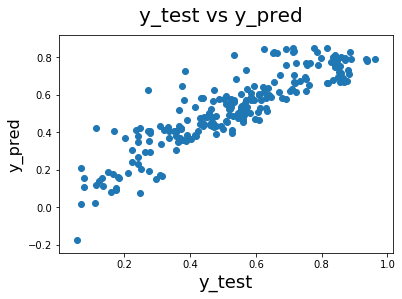

In [64]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)           

In [65]:
r2 = r2_score(y_test, y_pred)
r2

0.7833869196735483

In [66]:
print('The Durbin-Watson value for Final Model lr 6 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Final Model lr 6 is 1.9747


In [67]:
lr_model6.params[:]

const         0.221563
yr            0.232688
temp          0.446794
windspeed    -0.137933
spring       -0.119344
winter        0.051972
March         0.057230
September     0.064252
Light Snow   -0.289488
Sat           0.016824
Sun          -0.036529
dtype: float64

#### Temperature (Temp)
-A coefficient value of `0.478564` indicated that a temperature has significant impact on bike rentals
#### Light Rain & Snow (weathersit =3)
-A coefficient value of `-0.291333` indicated that the light snow and rain deters people from renting out bikes
#### Year (yr)
-A coefficient value of `0.233911` indicated that a year wise the rental numbers are increasing

- `So from 2018 to 2019 there has been 23% growth in terms of rental numbers`

-It is recommended to give utmost importance to these three variables while planning to achieve maximum bike rental booking.

-As high temperature and good weather positively impacts bike rentals, it is recommended that bike availability and promotions to be increased during summer months to further increase bike rentals.